<a href="https://colab.research.google.com/github/berberberk/apnd-fs-2024/blob/main/APND1_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# Гармонический осциллятор


In [31]:
omega = 1.0  # частота осциллятора
delta = 0.0  # начальная фаза
A = 1.0      # амплитуда

# Время
t = np.linspace(0, 10, 1000)

# Решение уравнений
x_t = A * np.cos(omega * t + delta)
v_t = -A * omega * np.sin(omega * t + delta)  # скорость как производная

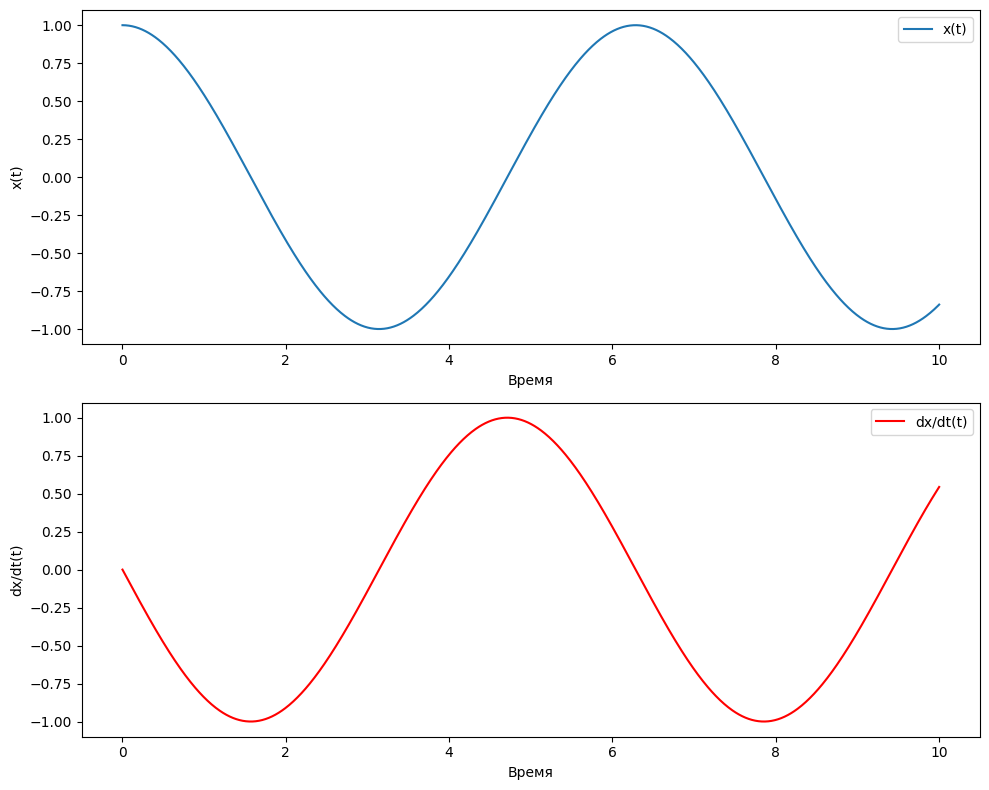

In [32]:
# Построение графиков x(t), dx/dt(t)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(t, x_t, label="x(t)")
axs[0].set_xlabel("Время")
axs[0].set_ylabel("x(t)")
axs[0].legend()

axs[1].plot(t, v_t, label="dx/dt(t)", color="r")
axs[1].set_xlabel("Время")
axs[1].set_ylabel("dx/dt(t)")
axs[1].legend()

plt.tight_layout()
plt.show()

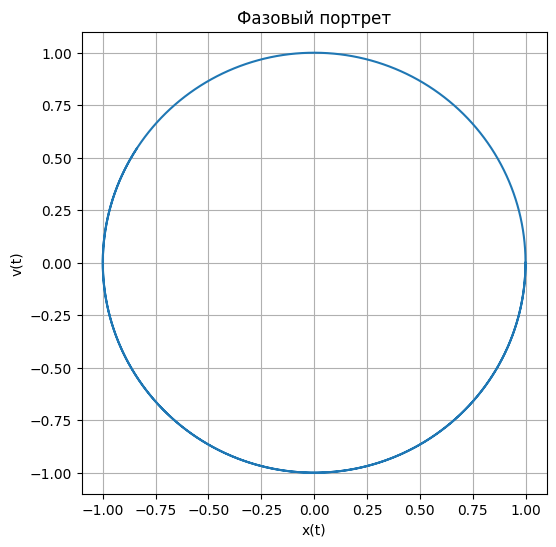

In [33]:
# Построение фазового портрета
plt.figure(figsize=(6, 6))
plt.plot(x_t, v_t)
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.title('Фазовый портрет')
plt.grid(True)
plt.show()

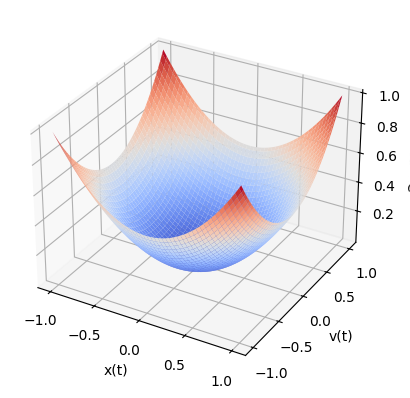

In [34]:
# Построение 3D-поверхности энергии
X, V = np.meshgrid(np.linspace(-A, A, 100), np.linspace(-omega*A, omega*A, 100))
E = 0.5 * V**2 + 0.5 * omega**2 * X**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, V, E, cmap='coolwarm')
ax.set_xlabel('x(t)')
ax.set_ylabel('v(t)')
ax.set_zlabel('Энергия')
plt.show()

# Ангармонический осциллятор

In [35]:
omega = 1.0   # частота осциллятора
alpha_values = [0.8, -0.8]   # коэффициент нелинейности
A = 1.0       # амплитуда
delta = 0.0   # начальная фаза

# Уравнение движения ангармонического осциллятора
def an_harmonic_oscillator(t, y, omega, alpha):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x - alpha * x**3
    return [dxdt, dvdt]

# Время интеграции
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

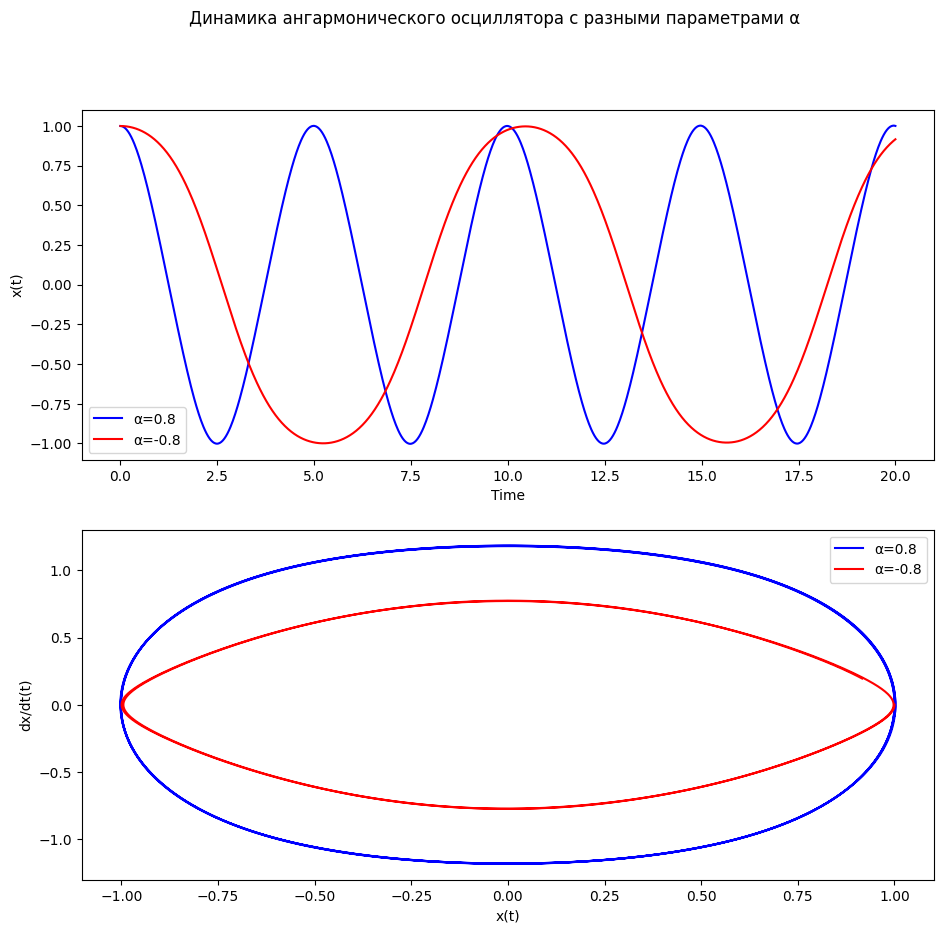

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(11, 10))
fig.suptitle('Динамика ангармонического осциллятора с разными параметрами α')

clr = ['b', 'r']
clr_i = 0
for alpha in alpha_values:
    # Начальные условия
    y0 = [A, 0]  # x(0) = A, v(0) = 0

    # Решение системы дифференциальных уравнений
    sol = solve_ivp(an_harmonic_oscillator, t_span, y0, args=(omega, alpha), t_eval=t_eval)

    # Графики x(t) и dx/dt(t)
    x_t = sol.y[0]
    v_t = sol.y[1]
    t = sol.t

    # Построение графиков x(t)
    axs[0].plot(t, x_t, label=f'α={alpha}', c=clr[clr_i])
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('x(t)')
    axs[0].legend()

    # Построение фазового портрета
    axs[1].plot(x_t, v_t, label=f'α={alpha}', c=clr[clr_i])
    axs[1].set_xlabel('x(t)')
    axs[1].set_ylabel('dx/dt(t)')
    axs[1].legend()

    clr_i += 1

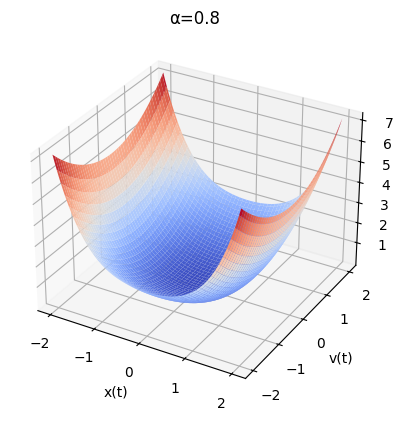

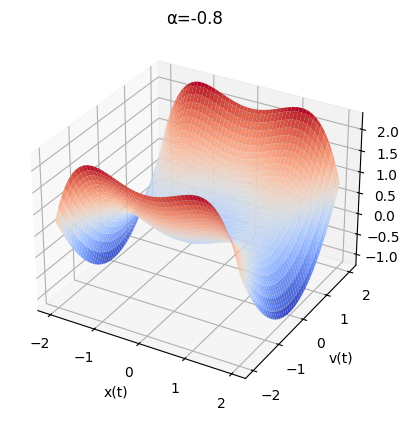

In [37]:
for alpha in alpha_values:
  X, V = np.meshgrid(np.linspace(-2*A, 2*A, 100), np.linspace(-2*omega*A, 2*omega*A, 100))
  E = 0.5 * V**2 + 0.5 * omega**2 * X**2 + (alpha/4) * X**4

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, V, E, cmap='coolwarm')
  ax.title.set_text(f'α={alpha}')
  ax.set_xlabel('x(t)')
  ax.set_ylabel('v(t)')
  ax.set_zlabel('Energy')
  plt.show()

# Гармонический осциллятор с трением

In [38]:
omega = 1    # собственная частота осциллятора
gamma_values = [0.1, 0.5, 1.0]  # коэффициент демпфирования (<omega, =omega, >omega)
A = 1.0        # начальная амплитуда
delta = 0.0    # начальная фаза

# Уравнение движения гармонического осциллятора с трением
def damped_harmonic_oscillator(t, y, gamma, omega):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - omega**2 * x
    return [dxdt, dvdt]

# Начальные условия
y0 = [A, 0]  # x(0) = A, v(0) = 0

# Время интеграции
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

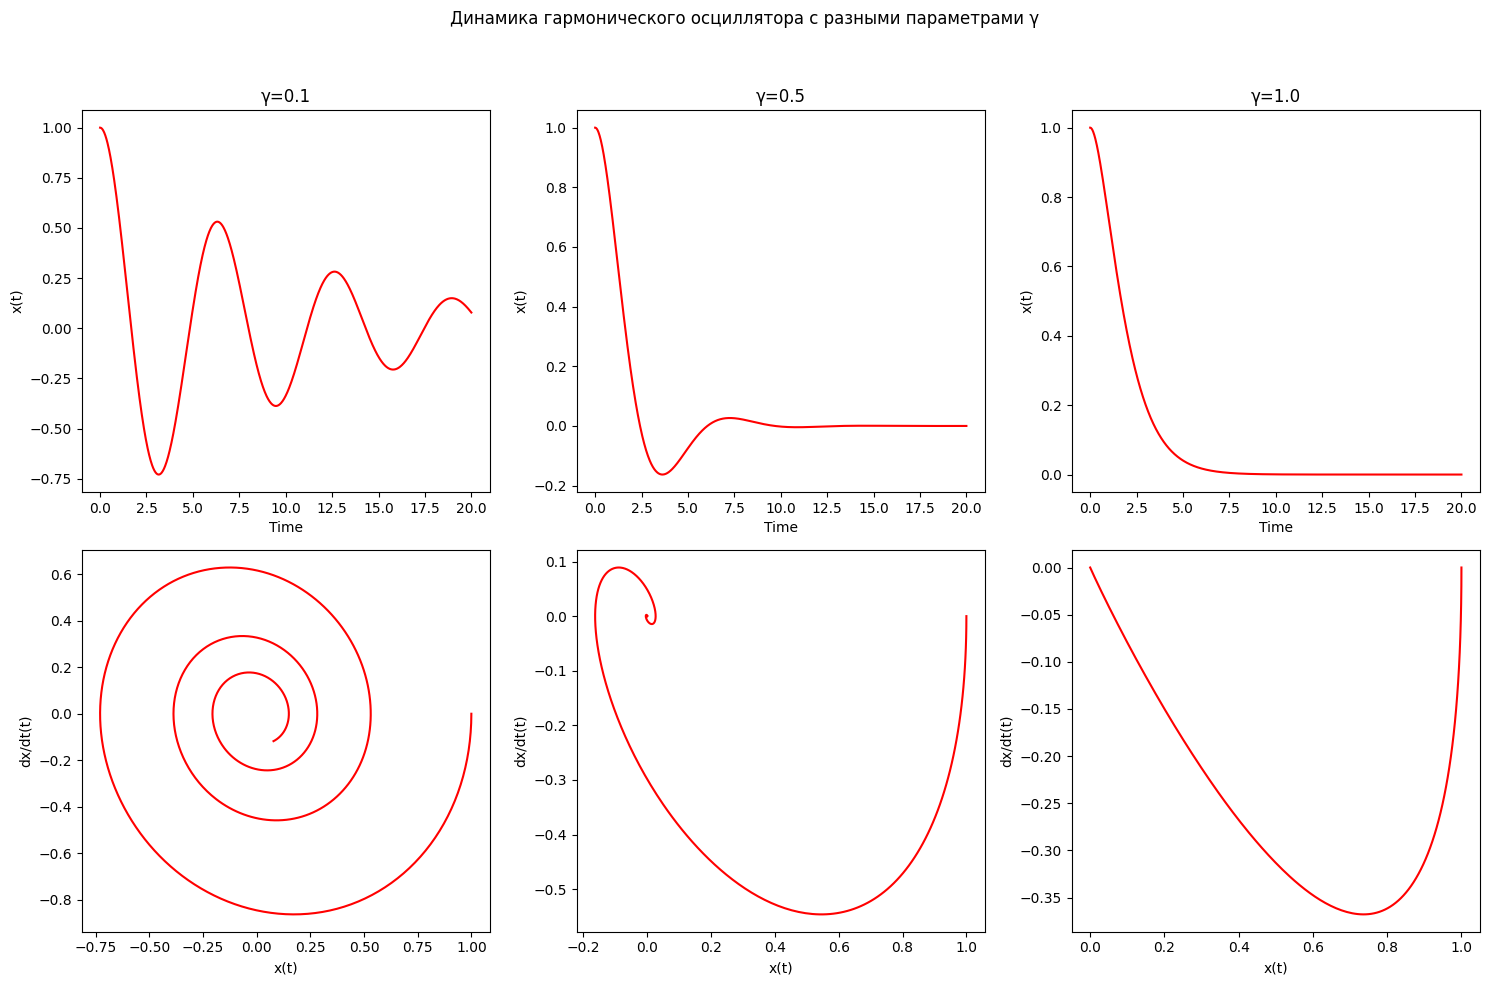

In [43]:
fig, axs = plt.subplots(2, len(gamma_values), figsize=(15, 10))
fig.suptitle('Динамика гармонического осциллятора с разными параметрами γ')

for i, gamma in enumerate(gamma_values):
        # Решение системы дифференциальных уравнений
        sol = solve_ivp(damped_harmonic_oscillator, t_span, y0, args=(gamma, omega), t_eval=t_eval)

        # Графики x(t) и dx/dt(t)
        x_t = sol.y[0]
        v_t = sol.y[1]
        t = sol.t

        # Построение графиков x(t)
        axs[0, i].plot(t, x_t, c='red')
        axs[0, i].set_title(f'γ={gamma}')
        axs[0, i].set_xlabel('Time')
        axs[0, i].set_ylabel('x(t)')

        # Построение фазового портрета
        axs[1, i].plot(x_t, v_t, c='red')
        axs[1, i].set_xlabel('x(t)')
        axs[1, i].set_ylabel('dx/dt(t)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Ангармонический осциллятор с трением

In [44]:
omega = 1.0    # собственная частота осциллятора
gamma_values = [0.1, 0.5, 1.0]   # коэффициент демпфирования
alpha_values = [0.2, -0.2]     # коэффициент нелинейности
A = 1.0        # начальная амплитуда

# Уравнение движения ангармонического осциллятора с трением
def anharmonic_oscillator_with_damping(t, y, gamma, omega, alpha):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - omega**2 * x - alpha * x**3
    return [dxdt, dvdt]

# Время интеграции
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

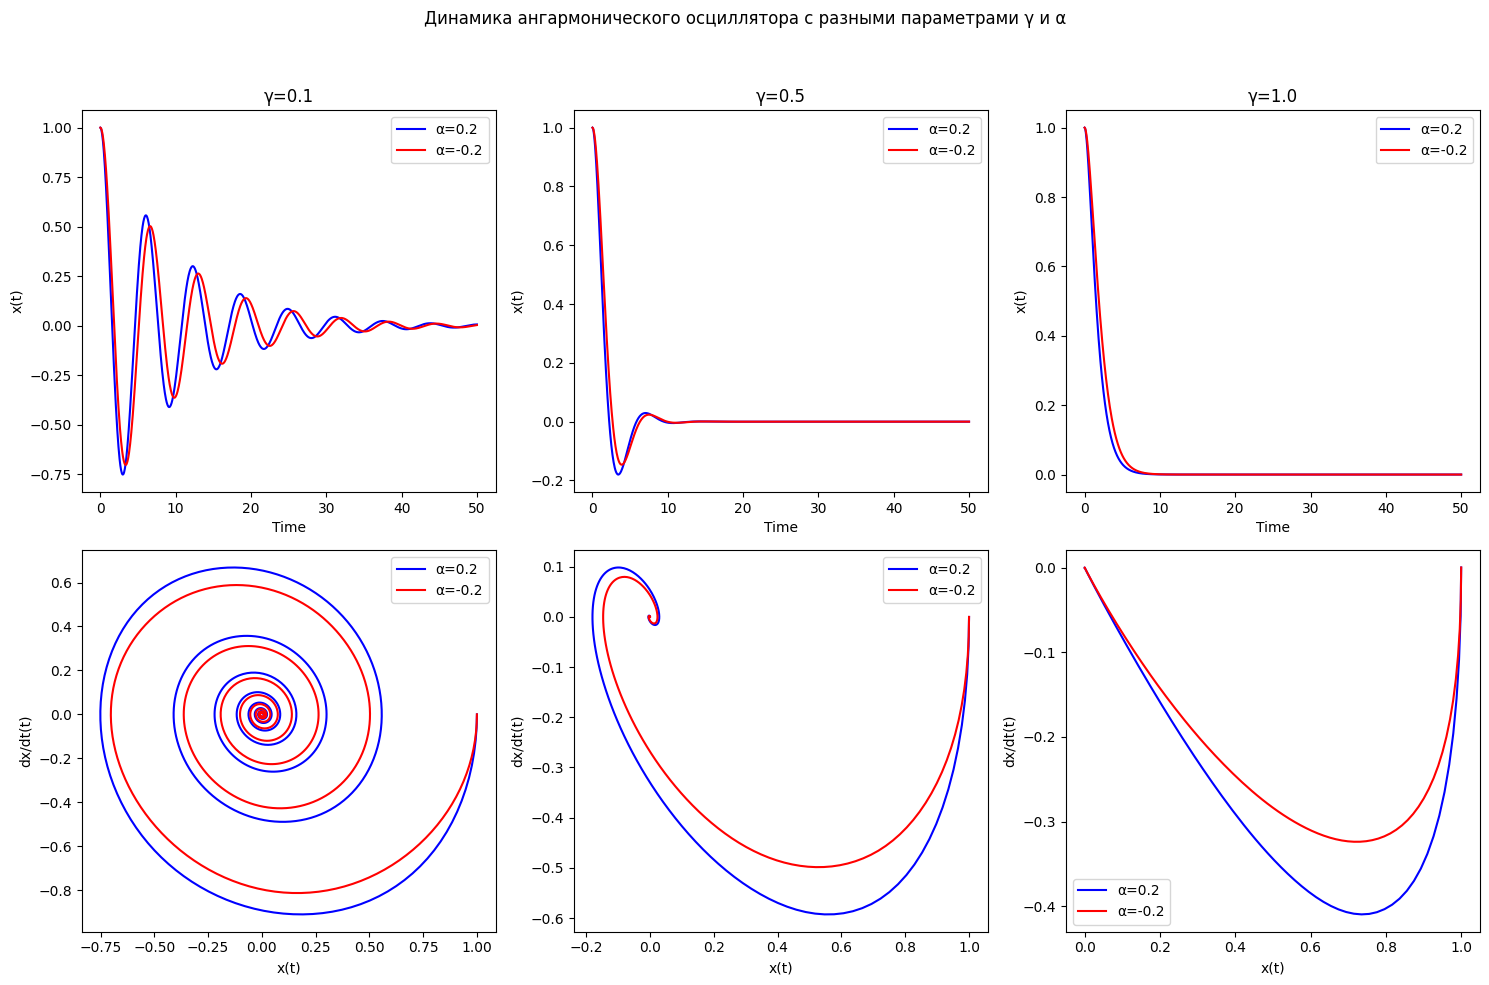

In [47]:
fig, axs = plt.subplots(2, len(gamma_values), figsize=(15, 10))
fig.suptitle('Динамика ангармонического осциллятора с разными параметрами γ и α')

clr = ['b', 'r']
clr_i = 0

for i, gamma in enumerate(gamma_values):
    for alpha in alpha_values:
        # Начальные условия
        y0 = [A, 0]  # x(0) = A, v(0) = 0

        # Решение системы дифференциальных уравнений
        sol = solve_ivp(anharmonic_oscillator_with_damping, t_span, y0, args=(gamma, omega, alpha), t_eval=t_eval)

        # Графики x(t) и dx/dt(t)
        x_t = sol.y[0]
        v_t = sol.y[1]
        t = sol.t

        # Построение графиков x(t)
        axs[0, i].plot(t, x_t, label=f'α={alpha}', c=clr[clr_i % 2])
        axs[0, i].set_title(f'γ={gamma}')
        axs[0, i].set_xlabel('Time')
        axs[0, i].set_ylabel('x(t)')
        axs[0, i].legend()

        # Построение фазового портрета
        axs[1, i].plot(x_t, v_t, label=f'α={alpha}', c=clr[clr_i % 2])
        axs[1, i].set_xlabel('x(t)')
        axs[1, i].set_ylabel('dx/dt(t)')
        axs[1, i].legend()

        clr_i += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()